In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import soundfile as sf
import sounddevice as sd
import datetime

%matplotlib inline
%config InlineBackend.figure_format = "retina"

/Users/ygong/Documents/speech_shadowing/conda_env_shadow/lib/python3.6/site-packages/scipy/signal/signaltools.py:1456: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
/Users/ygong/Documents/speech_shadowing/conda_env_shadow/lib/python3.6/site-packages/scipy/signal/signaltools.py:1456: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


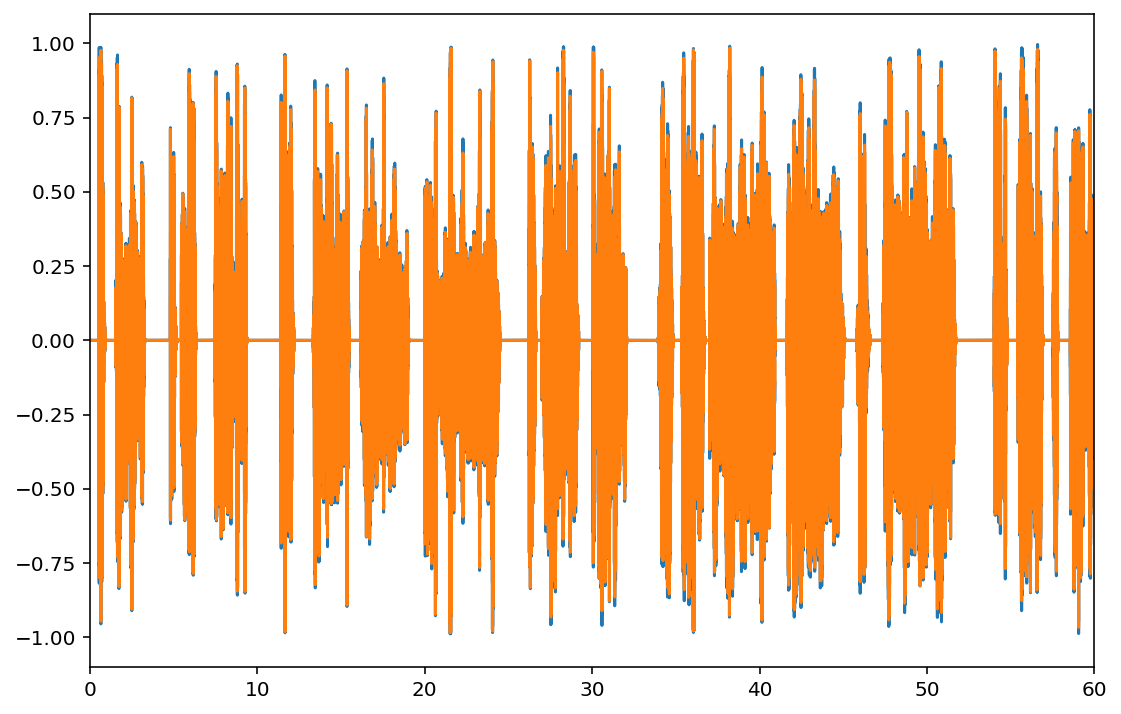

In [148]:
# load audio
data, fs = sf.read('./data/Track 2.wav', dtype='float32')
time = np.linspace(0, len(data) / fs, num=len(data))

# creat channel name
prefix = 'channel_'
n_channels = data.shape[1]
n_str = np.arange(1, n_channels + 1, 1, dtype=str)
channels = [prefix + i for i in n_str]

# convert to pandas df
pd_data = pd.DataFrame(data, columns=channels)
pd_data['seconds'] = time

fig, ax = plt.subplots(1, 1, figsize=(9,6))
ax.plot(pd_data['seconds'], pd_data['channel_1'])

f_data = wiener(data[:,0])
ax.plot(pd_data['seconds'], f_data)

ax.set_xlim([0, 60])
plt.show()

In [147]:
from scipy.signal import wiener

len(f_data)

6806100

In [124]:
# str(datetime.timedelta(seconds=65066))

'18:04:26'

In [48]:
# sd.play(data[:,0], fs)